In [1]:
!pip install -U scikit-learn scipy matplotlib
!pip install pandas
!pip install seaborn
!pip install plotly-express
!pip install -U scikit-learn

In [2]:
#importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#Plotting
import plotly_express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

from plotly.offline import plot, iplot,init_notebook_mode

#KNN
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer 

#Multi var regres
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder,PolynomialFeatures

#Build model
import warnings
warnings.filterwarnings('ignore')

In [124]:
#Clean the data
data = pd.read_csv('garments_worker_productivity.csv')
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [125]:
df = data.copy()

In [126]:
df.shape

(1197, 15)

In [127]:
df.info()


#     The dataset contains 1197 rows and 15 columns

#     Attribute Information:

#     date : Date in MM-DD-YYYY
#     day : Day of the Week
#     quarter : A portion of the month. A month was divided into four quarters
#     department : Associated department with the instance
#     teamno : Associated team number with the instance
#     noofworkers : Number of workers in each team
#     noofstylechange : Number of changes in the style of a particular product
#     targetedproductivity : Targeted productivity set by the Authority for each team for each day.
#     smv : Standard Minute Value, it is the allocated time for a task
#     wip : Work in progress. Includes the number of unfinished items for products
#     overtime : Represents the amount of overtime by each team in minutes
#     incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
#     idletime : The amount of time when the production was interrupted due to several reasons
#     idlemen : The number of workers who were idle due to production interruption
#     actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [128]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


In [129]:
df.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

Text(0.5, 1.0, 'Percent missing data by feature')

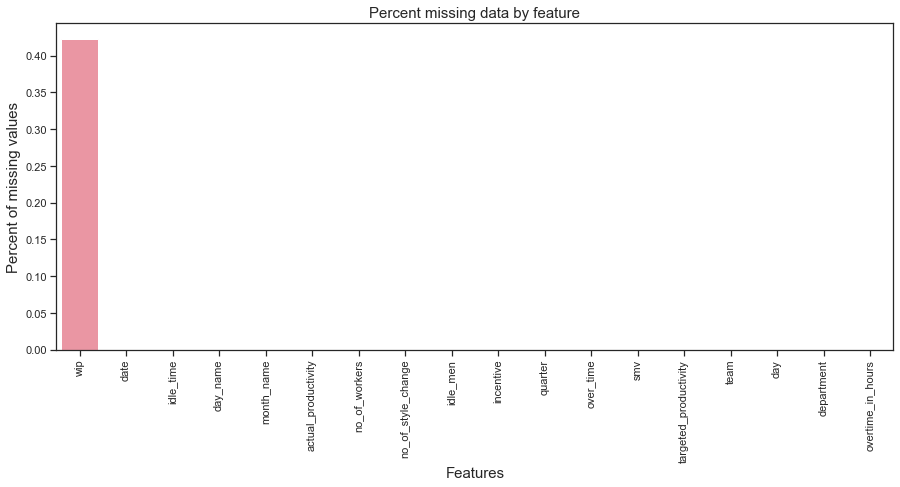

In [192]:
# Total 17 parameters.
# One parameter (wip) has the missing rate up to 42%.


total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])

plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

# missing_data.head()




In [131]:
df['date'] = pd.to_datetime(df['date'])
df['month_name'] = df['date'].dt.month_name()
df['day_name'] = df['date'].dt.day_name()



In [132]:
# Handling missing data
# Sort the value by team 
df.sort_values(by='team', ascending=True)

# Use kNN to handle missing value
imputer = KNNImputer(n_neighbors=5)
df['team'] = imputer.fit_transform(df[['team']])

# Print the data
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month_name,day_name
0,2015-01-01,Quarter1,sweing,Thursday,8.0,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,January,Thursday
1,2015-01-01,Quarter1,finishing,Thursday,1.0,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,January,Thursday
2,2015-01-01,Quarter1,sweing,Thursday,11.0,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,January,Thursday
3,2015-01-01,Quarter1,sweing,Thursday,12.0,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,January,Thursday
4,2015-01-01,Quarter1,sweing,Thursday,6.0,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,January,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,Quarter2,finishing,Wednesday,10.0,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333,March,Wednesday
1193,2015-03-11,Quarter2,finishing,Wednesday,8.0,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,March,Wednesday
1194,2015-03-11,Quarter2,finishing,Wednesday,7.0,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,March,Wednesday
1195,2015-03-11,Quarter2,finishing,Wednesday,9.0,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889,March,Wednesday


<AxesSubplot:>

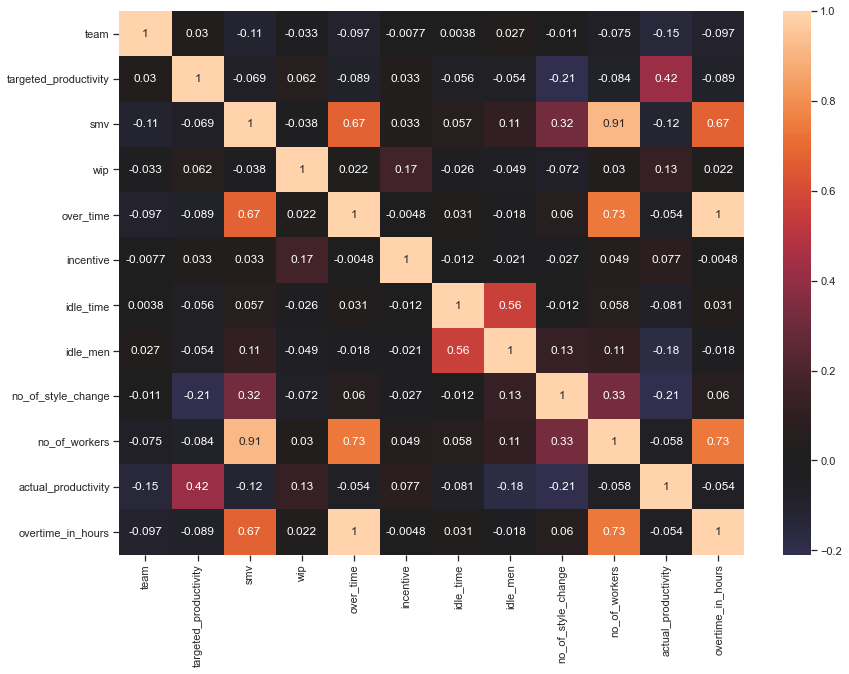

In [168]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, center=0)


# From here we can have some correlation pair:
#    no_of_worker & smv
#    no_of_worker & overtime
#    actual_productivity & target_productivity (only 0.42 so means that the actual productivity not meet requirements)


In [134]:
#create a new feature which has overtime measured in hours
df['overtime_in_hours'] = df['over_time'].apply(lambda x: x/60) 

In [135]:
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [136]:
df['department'].value_counts().index.to_list()

['sweing', 'finishing ', 'finishing']

In [137]:
#2x finishing => combine into 1
df['department'].value_counts().index.to_list()

['sweing', 'finishing ', 'finishing']

In [138]:
df['department'] = df['department'].apply(lambda x: 'finishing' if x == ('finishing ' or 'finishing' ) else 'sewing' )

In [139]:
df['day'].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Monday       199
Thursday     199
Saturday     187
Name: day, dtype: int64

In [140]:
dept = df.department.value_counts().reset_index()
dept.rename(columns = {'index':'department', 'department':'total_num'},inplace=True)
#Data analysis

fig = go.Figure(data=[go.Pie(labels=dept.department.to_list(),
                             values=dept.total_num.to_list())])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=['#ADEFD1FF', '#00203FFF'], line=dict(color='#000000', width=2)))
fig.show()

AttributeError: 'FacetGrid' object has no attribute 'update_layout'

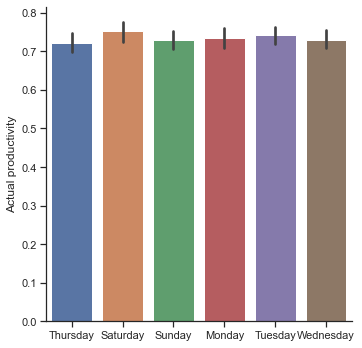

In [141]:
df['date'] = pd.to_datetime(df['date'])
df['month_name'] = df['date'].dt.month_name()
df['day_name'] = df['date'].dt.day_name()
fig = sns.catplot(
    data = df,
    x = "day_name", 
    y = "actual_productivity", 
    kind = "bar",
    dodge = True,
)

fig.set_axis_labels("", "Actual productivity")

fig.update_layout(
    title = 'Autual productivity in days of the week',
    title_x = 0.5,
    xaxis_tickfont_size = 14,
)


AttributeError: 'FacetGrid' object has no attribute 'layout'

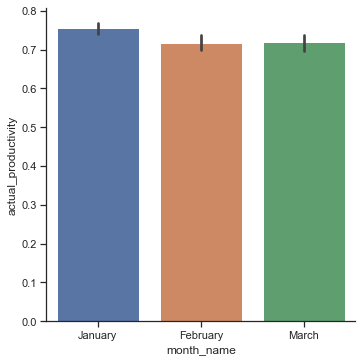

In [146]:
# df['day_name'] = df['date'].dt.day_name()
fig = sns.catplot(
    data = df,
    x = "month_name", 
    y = "actual_productivity", 
    kind="bar",
    dodge=True,
)

fig.layout.update()(
    title = 'Autual productivity from Jan 2015 to Mar 2015',
    title_x = 0.5,
    xaxis_tickfont_size = 14,
)


fig.set_axis_labels("", "Actual productivity")


fig.show()

In [ ]:
# df['day_name'] = df['date'].dt.day_name()
fig = sns.catplot(
    data = df,
    x = "quarter", 
    y = "actual_productivity", 
    kind="bar",
    dodge=True,
)
fig.set_axis_labels("", "Actual productivity")

In [112]:
qdf = df['quarter'].value_counts().reset_index()
#print(qdf)
qdf.rename(columns={'index': 'quarters', 'quarter': 'days_in_each_quarter'}, inplace=True)
qdf.info()

fig = px.pie(values=qdf.days_in_each_quarter.to_list(), names=qdf.quarters.to_list(), color_discrete_sequence=px.colors.sequential.RdBu)
#print(qdf)
fig.update_traces(marker_line_color='rgb(8,48,107)', marker_line_width=1, opacity=0.9, textposition='outside')
fig.update_traces(
    textposition='inside',
    textinfo='percent',
)

fig.update_layout(
    title = 'Distribution of quarter',
    title_x = 0.5,
    xaxis_tickfont_size = 14,
)

fig.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   quarters              5 non-null      object
 1   days_in_each_quarter  5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [147]:
qdf = df['team'].value_counts().reset_index()
# print(qdf)
qdf.rename(columns={'index': 'teams', 'team': 'total_day'}, inplace=True)
# print(qdf)
# qdf.info()

fig = px.pie(
    values = qdf.total_day.to_list(),
    names = qdf.teams.to_list(),
    color_discrete_sequence = px.colors.sequential.Aggrnyl
)

fig.update_traces(
    marker_line_color='rgb(8,48,107)',
    marker_line_width=1,
    opacity=0.9,
    textposition='outside'
)

fig.update_traces(
    textposition='inside',
    textinfo='percent',
)

fig.update_layout(
    title = 'Percent work distribution by Team',
    title_x = 0.5,
    xaxis_tickfont_size = 14,
)

fig.show()



# dept = df.department.value_counts().reset_index()
# dept.rename(columns = {'index':'department', 'department':'total_num'},inplace=True)
# #Data analysis

# fig = go.Figure(data=[go.Pie(labels=dept.department.to_list(),
#                              values=dept.total_num.to_list())])
# fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
#                   marker=dict(colors=['#ADEFD1FF', '#00203FFF'], line=dict(color='#000000', width=2)))
# fig.show()

In [169]:
qdf = df['team'].value_counts().reset_index()
# print(qdf)
qdf.rename(columns={'index': 'teams', 'team': 'total_day'}, inplace=True)
# print(qdf)
# qdf.info()

fig = px.pie(
    values = qdf.total_day.to_list(),
    names = qdf.teams.to_list(),
    color_discrete_sequence = px.colors.sequential.Aggrnyl
)

fig.update_traces(
    marker_line_color='rgb(8,48,107)',
    marker_line_width=1,
    opacity=0.9,
    textposition='outside'
)

fig.update_traces(
    textposition='inside',
    textinfo='percent',
)

fig.update_layout(
    title = 'Percent work distribution by Team',
    title_x = 0.5,
    xaxis_tickfont_size = 14,
)

fig.show()

In [187]:
teamdf = df[['team', 'actual_productivity']].groupby('team').mean()
teamdf = teamdf.sort_values('actual_productivity', ascending=False).reset_index()

colors = px.colors.sequential.RdBu[:12]

fig = px.bar(teamdf, 
    x="team", 
    y="actual_productivity", 
    color='actual_productivity',
)



fig.update_layout(
    xaxis=dict(
        title='Team number',
        titlefont_size=16,
        tickfont_size=14,
    ),
    yaxis=dict(
        title='Actual productivity',
        titlefont_size=16,
        tickfont_size=14,
    ),
    title_text='Actual productivity by Teams',
    title_x=0.5,
    xaxis_tickfont_size = 14,
)


fig.show()

In [191]:
teamdf = df[['team', 'targeted_productivity']].groupby('team').mean()
teamdf = teamdf.sort_values('targeted_productivity', ascending=False).reset_index()

colors = px.colors.sequential.RdBu[:12]

fig = px.bar(teamdf, 
    x="team", 
    y="targeted_productivity", 
    color='targeted_productivity',
)



fig.update_layout(
    title_text='Target productivity by Teams',
    title_x=0.5,
    xaxis_tickfont_size = 14,
)

fig.update_layout(
    xaxis=dict(
        title='Team number',
        titlefont_size=16,
        tickfont_size=14,
    ),
    yaxis=dict(
        title='Targeted productivity',
        titlefont_size=16,
        tickfont_size=14,
    ),
    title_text='Target productivity by Teams',
    title_x=0.5,
    xaxis_tickfont_size = 14,
)


fig.show()

In [21]:
fig = px.histogram(df, x="targeted_productivity", nbins=20, color_discrete_sequence=['rgb(55, 83, 109)'])

fig.update_layout(
    title = 'Distribution of Targeted productivity',
    title_x = 0.5,
    xaxis_tickfont_size = 14,
    
    xaxis = dict(
        title = 'Targeted Productivity',
        titlefont_size = 16,
        tickfont_size = 14,
    ),
    
    yaxis = dict(
        title = 'Records',
        titlefont_size = 16,
        tickfont_size = 14,
    ),
    barmode = 'group',
    bargap = 0.15,
    bargroupgap = 0.1,
)


fig.show()

# Target productivity by authorities: 
# 0.8 => 45.2% (540/1196)
# (0.7 + 0.75) => 38.3% (458/1196)
# Remainings: 16.5%

In [22]:
fig = px.histogram(df, x="actual_productivity", nbins=20, color_discrete_sequence=['rgb(242,170,76)'])

fig.update_layout(
    title = 'Distribution of Actual productivity',
    title_x = 0.5,
    xaxis_tickfont_size = 14,
    
    xaxis = dict(
        title = 'Actual Productivity',
        titlefont_size = 16,
        tickfont_size = 14,
    ),
    
    yaxis = dict(
        title = 'Records',
        titlefont_size = 16,
        tickfont_size = 14,
    ),
    
    barmode = 'group',
    bargap = 0.15,
    bargroupgap = 0.1,
)

fig.show()

# Work better than expected (> 0.825): 

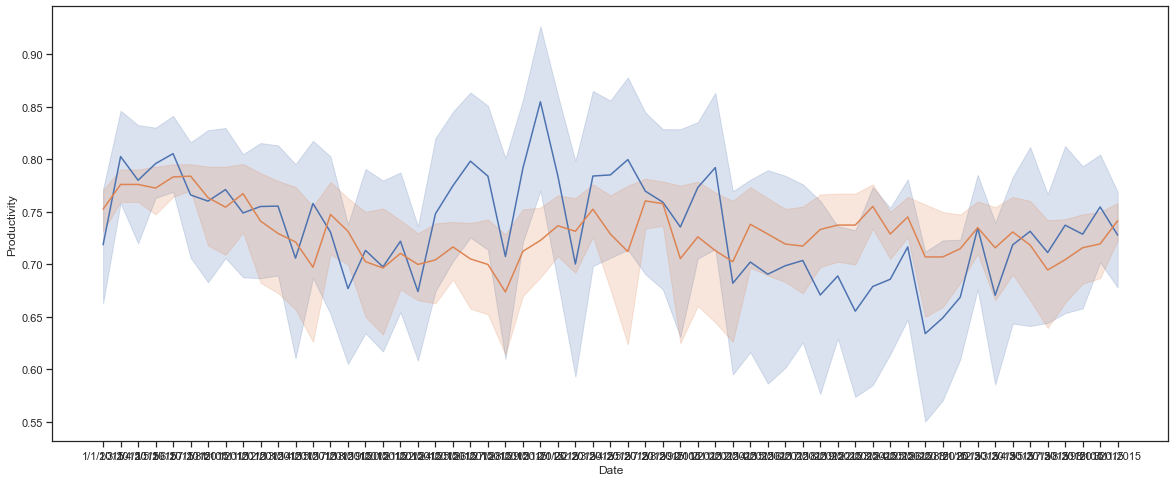

In [154]:
plt.figure(figsize = (20,8))
palette = sns.color_palette("mako_r", 6)
ax = sns.lineplot(
    y= 'actual_productivity',
    x='date',
    data=data,
    legend = 'brief',
    palette=palette,
)

ax = sns.lineplot(
    y='targeted_productivity',
    x='date' ,
    data =data,
    legend='brief',
    palette=palette,
)
#color_discrete_sequence=px.colors.qualitative.G10


ax.set(xlabel = 'Date', ylabel = 'Productivity')

plt.show()


In [23]:
#data = pd.read_csv('garments_worker_productivity.csv')
#df = data.copy()
idf = df[['team', 'incentive']].groupby('team').mean().sort_values('incentive', ascending=True).reset_index()
fig = px.bar(
    idf, 
    x= "team", 
    y= "incentive", 
    barmode = "group",
    #color_discrete_sequence =['green']*len(idf),
    color = "incentive",
#     color_discrete_map={
#         'incentive' = 'red',
#         'team' = 'blue',
#     },
    labels= {
        'incentive':'Incentive',
        'team' : 'Team number',
    }
)


fig.update_layout(
    title_text = 'Incentive paid to each team', 
    title_x = 0.5,
    font = dict(
        size = 20,
    ))

fig.show() 

In [193]:
import plotly.express as px
#data = pd.read_csv('garments_worker_productivity.csv')
#df = data.copy()
idf = df[['team', 'incentive']].groupby('team').mean().sort_values('incentive', ascending=True).reset_index()
fig = px.scatter_3d(
    df, 
    x="team", 
    y="incentive", 
    z="actual_productivity", 
    color="incentive", 
#     size="total", 
#     hover_name="district",
#     symbol="result", 
    
    color_discrete_map = {
        "team": "blue", 
        "incentive": "green", 
        "actual_productivity":"red"
    },
    labels= {
        'incentive':'Incentive',
        'team' : 'Team number',
        'actual_productivity': 'Actual Productivity',
    },
)

fig.update_layout(
    title_text = 'Incentive paid to each team w.r.t actual productivity', 
    title_x = 0.5,
)

fig.show()


In [25]:
data = pd.read_csv('garments_worker_productivity.csv')
df = data.copy()
#idf = df[['team', 'incentive']].groupby('team').mean().sort_values('incentive', ascending=True).reset_index()

fig = px.bar(
    df, 
    x= "no_of_workers", 
    y= "incentive", 
    barmode = "group",
    #color_discrete_sequence =['green']*len(idf),
    color = "no_of_workers",
#     color_discrete_map={
#         'incentive' = 'red',
#         'team' = 'blue',
#     },
    labels= {
        'incentive':'Incentive',
        'no_of_workers' : 'Number of workers',
    }
)


fig.update_layout(
    title_text = 'Incentive paid to workers', 

    title_x = 0.5,
    font = dict(
        size = 20,
    ),
    
    legend = dict(
        x = 0,
        y = 1.0,
        bgcolor ='rgba(255, 255, 255, 0)',
        bordercolor ='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.1,
    bargroupgap=0.1,
)

fig.show() 

In [26]:
df['date'] = pd.to_datetime(df['date'])
df['month_name'] = df['date'].dt.month_name()
# df['day_name'] = df['date'].dt.day_name()
y1 = df['no_of_workers']
y2 = df['incentive']
x = df['month_name']

fig = go.Figure(data=[
    go.Bar(
        x = x,
        y = y1,
        marker_color='rgb(55, 83, 109)',
        name='Number of workers',
    ),
    go.Bar(
        x = x, 
        y = y2,
        marker_color='rgb(26, 118, 255)',
        name='Incentive ',
    ),
])
    
    
fig.update_layout(
    title ='Number of workers and their incentive paid from Jan 2015 to Mar 2015',
    title_x = 0.5,
    font = dict(
        size = 16,
    ),
    barmode='group',
    bargap = 0.5,
    bargroupgap = 0.25 
)


fig.show()

# AccidentWeather=us_accident_2016['ACCIDENT'].WEATHER.map(json_map['ACCIDENT']['WEATHER'])
# AccidentWeather=AccidentWeather.drop(AccidentWeather[(AccidentWeather == "Clear")|(AccidentWeather == "Cloudy")].index)
# px.histogram(AccidentWeather, x='WEATHER',orientation='v')



In [35]:
# Multiple linear Regression
# This one later use for statictical analysis & build model.

le = LabelEncoder()
data['department'] = le.fit_transform(data['department'])


X=data[['targeted_productivity', 'team','smv','idle_men', 'no_of_style_change']]
y=data['actual_productivity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


s = StandardScaler()
X_train_sm = s.fit_transform(X_train)

mlr = LinearRegression()
mlr.fit(X_train_sm, y_train)
X_test_sm = s.transform(X_test)
y_pred_sm = mlr.predict(X_test_sm)

In [194]:
# Check the Productivity in day of the week

fig = go.Figure()
fig.add_trace(go.Bar(
    y=df['day'].to_list(),
    x=df['no_of_workers'].to_list(),
    name='Sewing',
    marker=dict(
        color='rgb(31,138,192)',
        line=dict(color='rgb(31,138,192)', width=3)
    ),
    orientation='h',
))

fig.add_trace(go.Bar(
    y=df['day'].to_list(),
    x=df['no_of_workers'].to_list(),
    name='Finishing',
    marker=dict(
        color='rgb(16,76,145)',
        line=dict(color='rgb(16,76,145)', width=3)
    ),
    orientation='h',
))

fig.update_layout(
    title = 'Productivity in day of the week',
    barmode = 'stack'
)

fig.show()

In [195]:
# Check the Productivity in day of the week

fig = go.Figure()

fig.add_trace(go.Bar(
    y=df['month_name'].to_list(),
    x=df['no_of_workers'].to_list(),
    name='Finishing',
    marker=dict(
        color='rgb(16,76,145)',
        line=dict(color='rgb(16,76,145)', width=3)
    ),
    orientation='h',
))

fig.add_trace(go.Bar(
    y=df['month_name'].to_list(),
    x=df['no_of_workers'].to_list(),
    name='Sewing',
    marker=dict(
        color='rgb(31,138,192)',
        line=dict(color='rgb(31,138,192)', width=3)
    ),
    orientation='h',
))

fig.update_layout(
    title = 'Monthly productivity',
    barmode = 'stack'
)

fig.show()

In [70]:
# y0 = df['no_of_workers']
# y1 = df['incentive']
# x = df['month_name']

# # y0
# # y1
# # x
# # fig = go.Figure()
# fig.add_trace(go.Histogram(
#     x= df['no_of_workers'],
#     histfunc="count",
# #     name='control', # name used in legend and hover labels
# #     xbins=dict( # bins used for histogram
# #         start=-4.0,
# #         end=3.0,
# #         size=0.5
# #     ),
# #     marker_color='#EB89B5',
# #     opacity=0.75
# ))
# # fig.add_trace(go.Histogram(
# #     x= df['incentive'],
# #     histfunc="count",
# #     name='experimental',
# #     xbins=dict(
# #         start=-3.0,
# #         end=4,
# #         size=0.5
# #     ),
# #     marker_color='#330C73',
# #     opacity=0.75
# # ))

# fig.update_layout(
#     title_text='Sampled Results', # title of plot
#     xaxis_title_text='Value', # xaxis label
#     yaxis_title_text='Count', # yaxis label
#     bargap=0.2, # gap between bars of adjacent location coordinates
#     bargroupgap=0.1 # gap between bars of the same location coordinates
# )

# fig.show()

In [77]:
df.duplicated().sum()
category = df.select_dtypes(include='object')
numerical = df.select_dtypes(exclude='object')
for c in category.columns:
    print(f"{c}")
    print(category[c].unique())
    print()

quarter
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']

department
['sweing' 'finishing ' 'finishing']

day
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']

month_name
['January' 'February' 'March']



In [79]:
# Fix an error of department
category.loc[:,'department'] = category.loc[:,'department'].str.strip()
numerical.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [197]:
import plotly.express as px
#data = pd.read_csv('garments_worker_productivity.csv')
#df = data.copy()
df['ratio_productivity'] = df['actual_productivity']/ df['targeted_productivity']
df=df.drop(df[df['ratio_productivity']>2].index)

idf = df[['team', 'actual_productivity']].groupby('team').mean().sort_values('actual_productivity', ascending=True).reset_index()
print(idf)
fig = px.scatter_3d(
    df, 
    x="no_of_workers", 
    y="no_of_style_change", 
    z="ratio_productivity", 
    color="no_of_style_change", 
#     size="total", 
#     hover_name="district",
#     symbol="result", 
    
    color_discrete_map = {
        "no_of_workers": "blue", 
        "no_of_style_change": "green", 
        "ratio_productivity":"red"
    },
    labels= {
        'no_of_workers':'Worker numbers',
        'no_of_style_change' : 'Style changes',
        'targeted_productivity': 'Target productivity',
    },
)

fig.update_layout(
    title_text = 'Actual productivity of team with different diversity in product and members', 
    title_x = 0.5,
)

fig.show()

    team  actual_productivity
0    7.0             0.669534
1    8.0             0.669728
2   11.0             0.681985
3    6.0             0.682244
4    5.0             0.696809
5   10.0             0.719736
6    9.0             0.734462
7    4.0             0.762997
8    2.0             0.770855
9   12.0             0.779055
10   3.0             0.803880
11   1.0             0.821054
